In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

def generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed):
    # Initialize graph
    G = nx.Graph()

    # Set random seeds
    random.seed(node_color_seed)
    edge_random = random.Random(edge_seed)

    # Generate color weights
    color_weights = {color: edge_random.uniform(0.5, 1.5) for color in colors}

    # Add nodes with weights based on their colors
    for i in range(num_nodes):
        weight = color_weights[colors[i % len(colors)]]
        color = colors[i % len(colors)]
        G.add_node(i, weight=weight, color=color)

    # Add edges based on edge probability
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if edge_random.random() < edge_probability:
                G.add_edge(i, j, weight=edge_random.uniform(0.5, 1.5))
    return G

# #Implement A* 
def find_shortest_path(G, start_node, end_node):
    path = nx.astar_path(G, start_node, end_node)
    edge_weights = []
    for i in range(len(path)-1):
        edge_weights.append(G[path[i]][path[i+1]]['weight'])
    print("Path:", path)
    print("Edge weights:", edge_weights)
    return path

def visualize_data(df):
    ax = df.plot.bar(x='Path', y='Length', rot=0)
    plt.show()

#Pass some parameters

num_nodes = 12
edge_probability = 0.3
node_color_seed = 42  # Set a fixed seed for node colors for reproducibility
edge_seed = 123  # Set a fixed seed for edge probabilities for reproducibility
colors = ['red', 'blue']   

# generate the weights to be correlated to the colors-done
# colors can be randomly done-done
# make a graph with colors assigned-done
# add preference for specific color-done
# generates diff weightings for someone who have preference for red or yellow and change only the weights on the same graph-done
# the graph is like a road network, colors are pref, weights show diff preferences-done
#the agents have a preference but the enviroment remains the same
# create one world and different preference funs
# the functio that creates the agents will have diferent color preferences
# number on the color is agent specific
# every node should have some random connections, a sparse graph-done
#generate graphs randomly of the same size(nodes), several diff preferences on the same graph, what weights look like with diff preference, 
# 1.generate a sigle graph with fixed colors-done
# 2.generate weighting for an agents with diferent colors-done
# 3.What is the optimal path-done

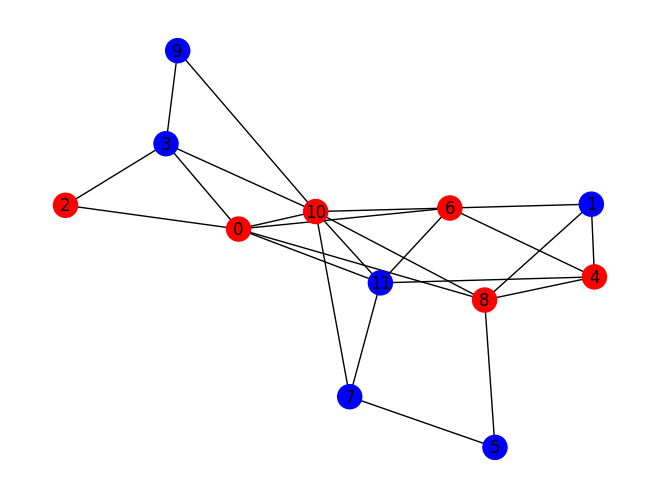

Path: [4, 11, 0, 2]
Edge weights: [0.588157294926076, 0.8154589737358633, 1.4011988779516946]
The shortest path between nodes 4 and 2 is: [4, 11, 0, 2]


In [2]:

G = generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed)

# Draw graph
node_colors = [G.nodes[i]['color'] for i in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)
plt.show() 

#Graph traversal
start_node = 4
end_node = 2
shortest_path = find_shortest_path(G, start_node, end_node)
print(f"The shortest path between nodes {start_node} and {end_node} is: {shortest_path}")


In [14]:
# The create_agent function creates an agent with a given list of color preferences,
# which is simply a list of the colors that the agent is interested in.
# The choose_node function is used by the agents to choose a node to visit. 
# It filters the possible nodes by color preference (if any), and then chooses a random node from the remaining possibilities.
# The traverse_graph_with_agents function is used to have the agents traverse the graph. It loops through the agents and has each
# agent choose a node to visit, and then appends the chosen node to the current path. If an agent has visited all the nodes 
# it's interested in, it is removed from the list of agents.

In [15]:
# generate the weights to be correlated to the colors-done
# colors can be randomly done-done
# make a graph with colors assigned-done
# add preference for specific color-done
# generates diff weightings for someone who have preference for red or yellow and change only the weights on the same graph-done
# the graph is like a road network, colors are pref, weights show diff preferences-done
#the agents have a preference but the enviroment remains the same
# create one world and different preference funs
# the functio that creates the agents will have diferent color preferences
# number on the color is agent specific
# every node should have some random connections, a sparse graph-done
#generate graphs randomly of the same size(nodes), several diff preferences on the same graph, what weights look like with diff preference, 
# 1.generate a sigle graph with fixed colors-done
# 2.generate weighting for an agents with diferent colors-done
# 3.What is the optimal path-done


Path: [4, 1, 4, 13, 7, 0, 10, 5, 3, 8, 9]


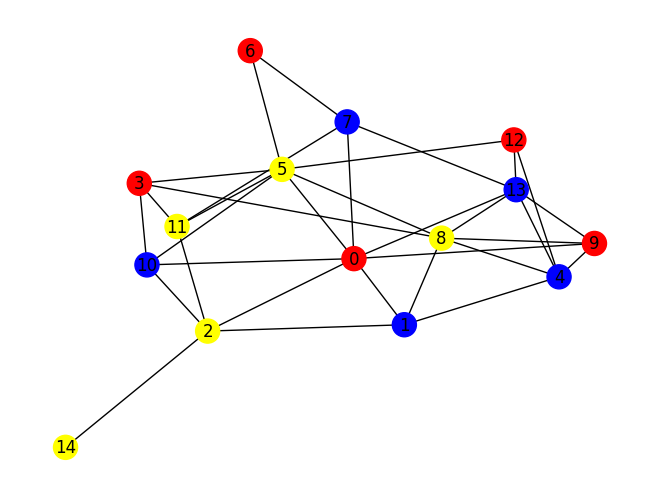

In [18]:
# Create the colored graph
num_nodes = 15
edge_probability = 0.3
node_color_seed = 42
edge_seed = 123
colors = ['red', 'blue','yellow']
G = generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed)

# Define the agent class
class Agent:
    def __init__(self, start_node, end_node, color_preference):
        self.current_node = start_node
        self.color_preference = color_preference
        self.visited_nodes = set()
        self.start_node = start_node
        self.end_node = end_node

    def find_next_node(self, graph):
        neighboring_nodes = graph.neighbors(self.current_node)
        unvisited_neighbors = [node for node in neighboring_nodes if node not in self.visited_nodes]

        # Find the neighbors with the preferred color
        neighbors_with_preference = [node for node in unvisited_neighbors if graph.nodes[node]['color'] == self.color_preference]

        if neighbors_with_preference:
            # Choose a neighbor with the preferred color
            next_node = random.choice(neighbors_with_preference)
        elif unvisited_neighbors:
            # Choose any unvisited neighbor
            next_node = random.choice(unvisited_neighbors)
        else:
            # No valid neighbors, return None
            next_node = None

        return next_node

    def traverse_graph(self, graph):
        path = [self.current_node]

        while self.current_node != self.end_node:
            next_node = self.find_next_node(graph)

            if next_node is None:
                # No more valid nodes to traverse, break the loop
                break

            self.visited_nodes.add(next_node)
            path.append(next_node)

            # Move to the next node by following the edge
            self.current_node = next_node

        return path

# Create the agent
start_node = 4
end_node = 9
color_preference = 'blue'
agent = Agent(start_node, end_node, color_preference)

# Traverse the graph with the agent
path = agent.traverse_graph(G)

# Print the path taken by the agent
print("Path:", path)

# Draw graph
node_colors = [G.nodes[i]['color'] for i in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()


In [19]:
node_colors = {}

for node in G.nodes():
    color = G.nodes[node]['color']
    node_colors[node] = color

print(node_colors)

{0: 'red', 1: 'blue', 2: 'yellow', 3: 'red', 4: 'blue', 5: 'yellow', 6: 'red', 7: 'blue', 8: 'yellow', 9: 'red', 10: 'blue', 11: 'yellow', 12: 'red', 13: 'blue', 14: 'yellow'}


In [20]:
def simulate_agents(graph, num_agents, num_traversals):
    agent_data = []
    
    for traversal in range(num_traversals):
        success_count = [0] * num_agents  # To track success rate for each agent

        for agent_id in range(num_agents):
            # Create a new agent for each traversal
            start_node = random.choice(list(graph.nodes()))
            end_node = random.choice(list(graph.nodes()))
            color_preference = random.choice(colors)
            agent = Agent(start_node, end_node, color_preference)

            # Record the start time
            start_time = time.time()

            # Traverse the graph with the agent
            path = agent.traverse_graph(graph)

            # Record the end time and compute the time taken
            end_time = time.time()
            time_taken = end_time - start_time
            
            # Check if reached destination
            reached_destination = agent.current_node == agent.end_node
            if reached_destination:
                success_count[agent_id] += 1

            # Compute new variables
            average_speed = len(path) / time_taken if time_taken > 0 else None
            preferred_color_count = sum(1 for node in path if graph.nodes[node]['color'] == color_preference)
            distinct_nodes_visited = len(set(path))
            path_complexity = sum(1 for i in range(1, len(path)) if path[i] != path[i - 1])  
            traversal_success_rate = success_count[agent_id] / (traversal + 1)

            # Saving the trajectory data of the agent, including the new variables
            agent_trajectory = {
                'Agent': agent_id,
                'Start Node': start_node,
                'End Node': end_node,
                'Color Preference': color_preference,
                'Path': path,
                'Length': len(path),
                'Time Taken': time_taken,
#                 'Average_Speed': average_speed,
                'Preferred_Color_Count': preferred_color_count,
                'Distinct_Nodes_Visited': distinct_nodes_visited,
                'Path_Complexity': path_complexity,
                'Traversal_Success_Rate': traversal_success_rate
            }

            agent_data.append(agent_trajectory)

    # Create a dataframe from the agent data
    df = pd.DataFrame(agent_data)
    return df

# Set the number of agents and traversals
num_agents = 2
num_traversals = 80

# Simulate agents traversing the graph and collect the trajectory data
trajectory_df = simulate_agents(G, num_agents, num_traversals)
# filtered_df = trajectory_df[trajectory_df['Reached_Destination'] == True]
filtered_df = trajectory_df[trajectory_df['Start Node'] != trajectory_df['End Node']]
# filtered_df.drop("Reached_Destination", axis=1, inplace=True)
filtered_df.reset_index(drop=True, inplace=True)

# Print the trajectory data
filtered_df.head(10)

NameError: name 'time' is not defined

In [21]:
# filtered_df.shape

In [10]:
filtered_df.columns

NameError: name 'filtered_df' is not defined

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

df = filtered_df
# Create a distance matrix based on the path lengths
distance_matrix = np.zeros((len(df), len(df)))
for i, path1 in enumerate(df['Path']):
    for j, path2 in enumerate(df['Path']):
        distance_matrix[i, j] = len(set(path1 + path2)) - len(set(path1))

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df['Agent'].tolist(), orientation='right')
plt.xlabel('Distance')
plt.ylabel('Agent')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

NameError: name 'filtered_df' is not defined

In [94]:
# Cutting the dendrogram at a specific height to form clusters
# from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# from sklearn.metrics import silhouette_score

# max_d = 5 # You can change this value to get a different number of clusters
# clusters = fcluster(linkage_matrix, max_d, criterion='distance')

# # Computing the silhouette score (higher is better, -1 to 1 range)
# silhouette_avg = silhouette_score(linkage_matrix, clusters)
# print("Silhouette Score:", silhouette_avg)

# # clusters variable now holds the cluster labels
# print("Cluster Labels:", clusters)

In [95]:
# Calculate the Adjusted Rand Index (ARI)
# ari = adjusted_rand_score(df['Color Preference'], cluster_labels)
# print("Adjusted Rand Index (ARI):", ari)

# # Calculate the Adjusted Mutual Information (AMI)
# ami = adjusted_mutual_info_score(df['Color Preference'], cluster_labels)
# print("Adjusted Mutual Information (AMI):", ami)

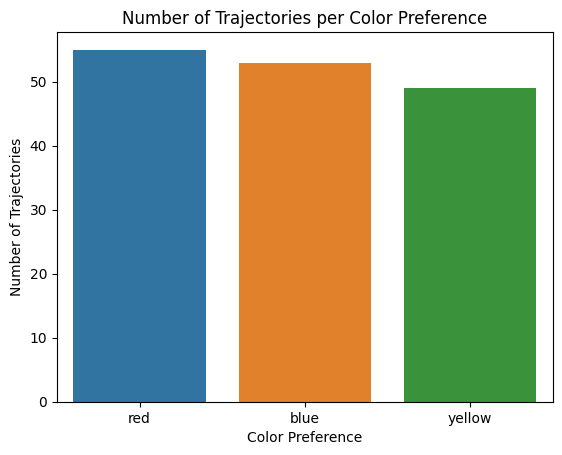

In [96]:
# Count the number of trajectories per color preference
color_counts = df['Color Preference'].value_counts()

# Create a bar plot of the number of trajectories per color preference
sns.barplot(x=color_counts.index, y=color_counts.values)
plt.xlabel('Color Preference')
plt.ylabel('Number of Trajectories')
plt.title('Number of Trajectories per Color Preference')
plt.show()

In [97]:
# Implementing DBScan

# Read the dataset into a DataFrame
data = filtered_df

# Convert the 'Path' column to strings
data['Path'] = data['Path'].apply(lambda x: ','.join(map(str, x)))

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Agent', 'Start Node', 'End Node', 'Length', 'Time Taken']])

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.4, min_samples=2)
clusters = dbscan.fit_predict(scaled_features)

# Add the cluster labels to the DataFrame
data['Cluster'] = clusters

# Print the resulting clusters
print(data[['Agent', 'Start Node', 'End Node', 'Color Preference', 'Path', 'Length', 'Cluster', 'Time Taken']])


     Agent  Start Node  End Node Color Preference  \
0        0          48        10           yellow   
1        1          49        18              red   
2        0          23        22              red   
3        1          41        29              red   
4        0          29        33             blue   
..     ...         ...       ...              ...   
152      1          24        25              red   
153      0          23         3              red   
154      1          40        18           yellow   
155      0          32        24             blue   
156      1          35        30           yellow   

                                                  Path  Length  Cluster  \
0    48,44,29,32,8,11,20,2,17,47,23,41,14,38,26,5,4...      31       -1   
1                            49,15,0,39,45,30,24,36,18       9       -1   
2    23,30,3,48,39,0,15,27,6,42,36,24,12,18,9,23,47...      27       -1   
3    41,24,30,3,48,39,45,42,36,21,0,9,18,12,14,27,6...      25 

C:\Users\taodz\AppData\Local\Temp\ipykernel_7568\2656661364.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Path'] = data['Path'].apply(lambda x: ','.join(map(str, x)))
C:\Users\taodz\AppData\Local\Temp\ipykernel_7568\2656661364.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = clusters


In [98]:
data.head()

,Agent,Start Node,End Node,Color Preference,Path,Length,Time Taken,Average_Speed,Preferred_Color_Count,Distinct_Nodes_Visited,Path_Complexity,Traversal_Success_Rate,Cluster
0,0,48,10,yellow,"48,44,29,32,8,11,20,2,17,47,23,41,14,38,26,5,4...",31,0.0,NaN,16,31,30,1.000000,-1
1,1,49,18,red,"49,15,0,39,45,30,24,36,18",9,0.0,NaN,8,9,8,1.000000,-1
2,0,23,22,red,"23,30,3,48,39,0,15,27,6,42,36,24,12,18,9,23,47...",27,0.0,NaN,17,26,26,0.500000,-1
3,1,41,29,red,"41,24,30,3,48,39,45,42,36,21,0,9,18,12,14,27,6...",25,0.0,NaN,17,25,24,0.500000,-1
4,0,29,33,blue,"29,43,13,37,1,46,19,10,25,34,28,7,31,16,4,40,1...",24,0.0,NaN,17,23,23,0.333333,0


In [99]:
# Calculate the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(data['Color Preference'], data.Cluster)
print("Adjusted Rand Index (ARI):", ari)

# Calculate the Adjusted Mutual Information (AMI)
ami = adjusted_mutual_info_score(data['Color Preference'], data.Cluster)
print("Adjusted Mutual Information (AMI):", ami)

Adjusted Rand Index (ARI): -0.003298197593773391
Adjusted Mutual Information (AMI): -0.0092293408582974


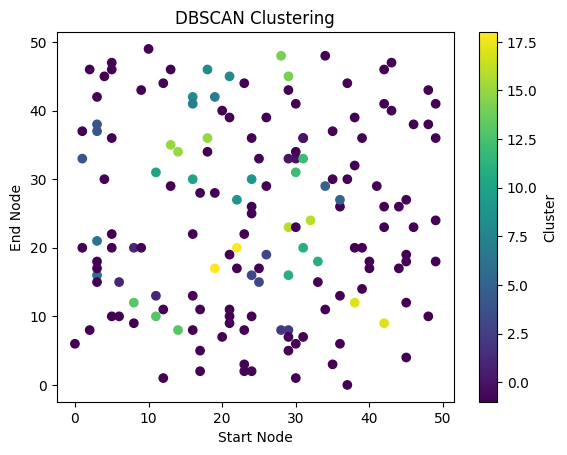

In [100]:
# Create a scatter plot of the clusters
plt.scatter(data['Start Node'], data['End Node'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Start Node')
plt.ylabel('End Node')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

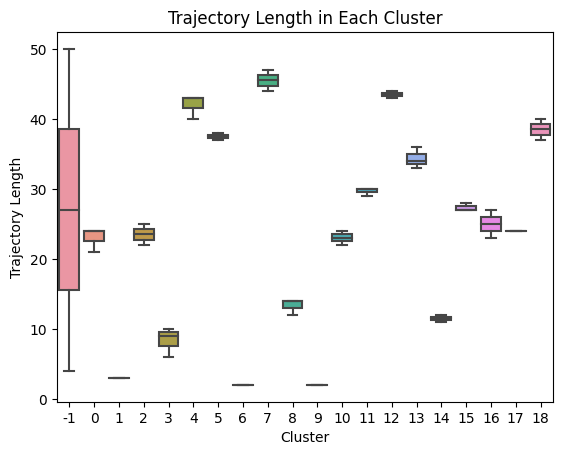

In [101]:
sns.boxplot(x='Cluster', y='Length', data=data)
plt.xlabel('Cluster')
plt.ylabel('Trajectory Length')
plt.title('Trajectory Length in Each Cluster')
plt.show()

C:\Users\taodz\AppData\Local\Temp\ipykernel_7568\1446607692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Path'] = data['Path'].apply(lambda x: ','.join(map(str, x)))
C:\Users\taodz\AppData\Local\Temp\ipykernel_7568\1446607692.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = cluster_labels


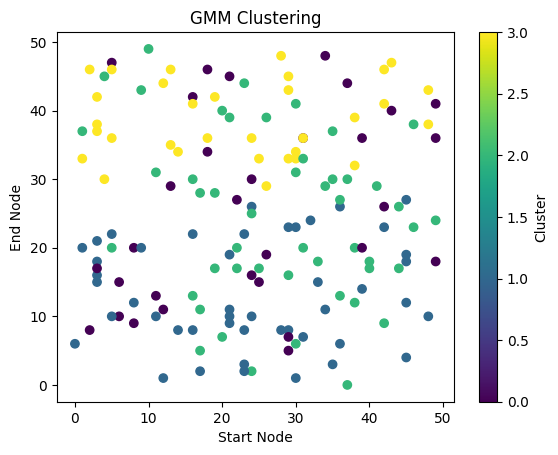

In [102]:
# Gaussian Mixture Model (GMM) clustering

# Convert the 'Path' column to strings
data['Path'] = data['Path'].apply(lambda x: ','.join(map(str, x)))

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Agent', 'Start Node', 'End Node', 'Length']])

# Perform GMM clustering
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(scaled_features)

# Assign cluster labels to the data
cluster_labels = gmm.predict(scaled_features)
data['Cluster'] = cluster_labels

# Print the resulting clusters
# print(data[['Agent', 'Start Node', 'End Node', 'Color Preference', 'Path', 'Length', 'Cluster']])

import matplotlib.pyplot as plt

# Create a scatter plot of the clusters
plt.scatter(data['Start Node'], data['End Node'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Start Node')
plt.ylabel('End Node')
plt.title('GMM Clustering')
plt.colorbar(label='Cluster')
plt.show()


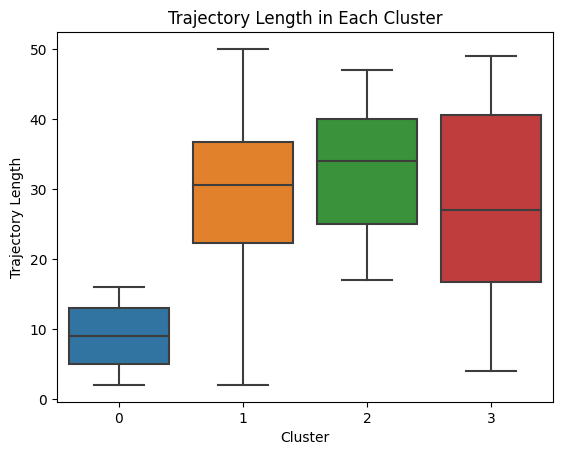

In [103]:
# Create a box plot of trajectory lengths for each cluster
sns.boxplot(x='Cluster', y='Length', data=data)
plt.xlabel('Cluster')
plt.ylabel('Trajectory Length')
plt.title('Trajectory Length in Each Cluster')
plt.show()

In [109]:
#K-Means

In [118]:
filtered_df.head()

,Agent,Start Node,End Node,Color Preference,Path,Length,Time Taken,Average_Speed,Preferred_Color_Count,Distinct_Nodes_Visited,Path_Complexity,Traversal_Success_Rate,Cluster
0,0,48,10,yellow,"4,8,,,4,4,,,2,9,,,3,2,,,8,,,1,1,,,2,0,,,2,,,1,...",31,0.0,NaN,16,31,30,1.000000,1
1,1,49,18,red,"4,9,,,1,5,,,0,,,3,9,,,4,5,,,3,0,,,2,4,,,3,6,,,1,8",9,0.0,NaN,8,9,8,1.000000,0
2,0,23,22,red,"2,3,,,3,0,,,3,,,4,8,,,3,9,,,0,,,1,5,,,2,7,,,6,...",27,0.0,NaN,17,26,26,0.500000,1
3,1,41,29,red,"4,1,,,2,4,,,3,0,,,3,,,4,8,,,3,9,,,4,5,,,4,2,,,...",25,0.0,NaN,17,25,24,0.500000,2
4,0,29,33,blue,"2,9,,,4,3,,,1,3,,,3,7,,,1,,,4,6,,,1,9,,,1,0,,,...",24,0.0,NaN,17,23,23,0.333333,3


In [120]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import pandas as pd

df = filtered_df

# Extract the path sequences from the dataframe
path_sequences = df['Path'].astype(str)

# Convert the path sequences into numerical features using CountVectorizer
vectorizer = CountVectorizer()
path_features = vectorizer.fit_transform(path_sequences)

# Perform K-means clustering
num_clusters = 4  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(path_features)

# Add the cluster labels to the dataframe
df['Cluster'] = cluster_labels

# Print the clustered trajectory data
trajectory_df = df
# [['Agent', 'Path', 'Cluster']]
print(trajectory_df.head())


   Agent  Start Node  End Node Color Preference  \
0      0          48        10           yellow   
1      1          49        18              red   
2      0          23        22              red   
3      1          41        29              red   
4      0          29        33             blue   

                                                Path  Length  Time Taken  \
0  [48, 44, 29, 32, 8, 11, 20, 2, 17, 47, 23, 41,...      31         0.0   
1                [49, 15, 0, 39, 45, 30, 24, 36, 18]       9         0.0   
2  [23, 30, 3, 48, 39, 0, 15, 27, 6, 42, 36, 24, ...      27         0.0   
3  [41, 24, 30, 3, 48, 39, 45, 42, 36, 21, 0, 9, ...      25         0.0   
4  [29, 43, 13, 37, 1, 46, 19, 10, 25, 34, 28, 7,...      24         0.0   

   Preferred_Color_Count  Distinct_Nodes_Visited  Path_Complexity  \
0                     16                      31               30   
1                      8                       9                8   
2                     17     

C:\Users\taodz\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\taodz\AppData\Local\Temp\ipykernel_7568\2787204709.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = cluster_labels


In [121]:
cluster_labels

array([3, 1, 0, 0, 2, 2, 1, 3, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 3, 0, 1,
       2, 1, 0, 1, 2, 3, 1, 0, 3, 0, 0, 1, 3, 3, 3, 2, 0, 2, 0, 3, 0, 1,
       0, 2, 0, 1, 1, 0, 3, 2, 0, 1, 2, 1, 0, 0, 3, 2, 1, 0, 1, 0, 0, 1,
       0, 0, 2, 2, 0, 1, 3, 3, 1, 3, 2, 3, 0, 2, 1, 0, 1, 2, 2, 3, 0, 3,
       0, 0, 3, 1, 3, 0, 0, 0, 0, 0, 2, 0, 0, 3, 1, 1, 2, 1, 3, 2, 0, 2,
       0, 1, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 3, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 3, 0, 0, 1,
       0, 2, 0])

In [122]:
# Create a dictionary to store the color frequencies within each cluster
cluster_color_counts = {}

# Iterate over each node and its corresponding cluster label
for node, cluster in zip(G.nodes(), cluster_labels):
    color = node_colors[node]
    
    # Get the cluster color count dictionary for the current cluster
    cluster_color_count = cluster_color_counts.setdefault(cluster, {})
    
    # Increment the color count within the cluster
    cluster_color_count[color] = cluster_color_count.get(color, 0) + 1

# Iterate over the cluster color counts to calculate the percentages
cluster_color_percentages = {}
for cluster, color_counts in cluster_color_counts.items():
    total_count = sum(color_counts.values())
    color_percentages = {color: count / total_count * 100 for color, count in color_counts.items()}
    cluster_color_percentages[cluster] = color_percentages

cluster_color_percentages


{3: {'red': 44.44444444444444,
  'blue': 33.33333333333333,
  'yellow': 22.22222222222222},
 1: {'blue': 33.33333333333333, 'red': 46.666666666666664, 'yellow': 20.0},
 0: {'yellow': 43.75, 'red': 25.0, 'blue': 31.25},
 2: {'blue': 40.0, 'yellow': 40.0, 'red': 20.0}}

In [124]:
# Calculate the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df['Color Preference'], cluster_labels)
print("Adjusted Rand Index (ARI):", ari)

# Calculate the Adjusted Mutual Information (AMI)
ami = adjusted_mutual_info_score(df['Color Preference'], cluster_labels)
print("Adjusted Mutual Information (AMI):", ami)

Adjusted Rand Index (ARI): 0.2764546523741584
Adjusted Mutual Information (AMI): 0.3795144330710835


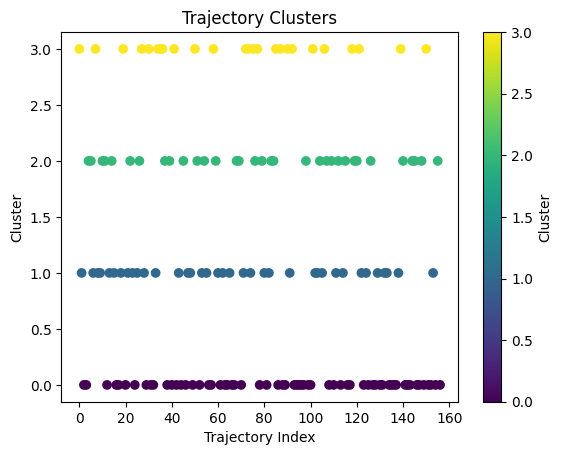

In [125]:
import matplotlib.pyplot as plt

# Create a scatter plot of the clusters
plt.scatter(filtered_df.index, filtered_df['Cluster'], c=filtered_df['Cluster'], cmap='viridis')

# Set the plot title and labels
plt.title('Trajectory Clusters')
plt.xlabel('Trajectory Index')
plt.ylabel('Cluster')

# Add a colorbar legend
cbar = plt.colorbar()
cbar.set_label('Cluster')

# Display the plot
plt.show()


In [126]:
# How many nodes in each cluster

# Create a DataFrame from the clusterred data
df = filtered_df

# Calculate the number of nodes in each cluster
nodes_per_cluster = df.groupby('Cluster')['Path'].apply(lambda x: sum(len(path) for path in x)).to_dict()

# Print the results
for cluster, node_count in nodes_per_cluster.items():
    print(f"Cluster {cluster}: {node_count} nodes")


Cluster 0: 2399 nodes
Cluster 1: 287 nodes
Cluster 2: 813 nodes
Cluster 3: 564 nodes


In [127]:
filtered_df.head()

,Agent,Start Node,End Node,Color Preference,Path,Length,Time Taken,Preferred_Color_Count,Distinct_Nodes_Visited,Path_Complexity,Traversal_Success_Rate,Cluster
0,0,48,10,yellow,"[48, 44, 29, 32, 8, 11, 20, 2, 17, 47, 23, 41,...",31,0.0,16,31,30,1.000000,3
1,1,49,18,red,"[49, 15, 0, 39, 45, 30, 24, 36, 18]",9,0.0,8,9,8,1.000000,1
2,0,23,22,red,"[23, 30, 3, 48, 39, 0, 15, 27, 6, 42, 36, 24, ...",27,0.0,17,26,26,0.500000,0
3,1,41,29,red,"[41, 24, 30, 3, 48, 39, 45, 42, 36, 21, 0, 9, ...",25,0.0,17,25,24,0.500000,0
4,0,29,33,blue,"[29, 43, 13, 37, 1, 46, 19, 10, 25, 34, 28, 7,...",24,0.0,17,23,23,0.333333,2


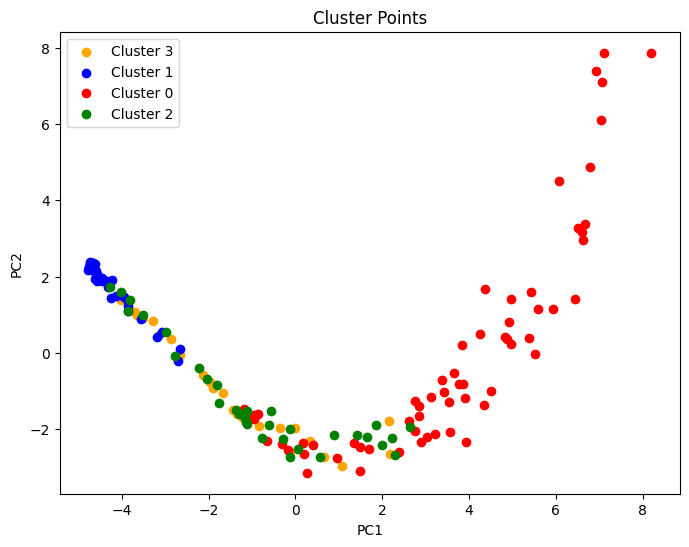

In [134]:
# PCA to plot the cluster  points
# Create a DataFrame from the table data

# Transform paths into a suitable format for PCA
path_matrix = np.zeros((len(filtered_df), filtered_df['Length'].max()))
for i, path in enumerate(filtered_df['Path']):
    path_matrix[i, :len(path)] = path

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
scaled_path_matrix = scaler.fit_transform(path_matrix)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_path_matrix)

# Create a new DataFrame with the principal components and cluster information
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plot the cluster points
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Adjust the colors based on the number of clusters
for cluster in pca_df['Cluster'].unique():
    cluster_points = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], color=colors[cluster], label=f'Cluster {cluster}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Points')
plt.legend()
plt.show()

In [135]:
import Levenshtein

# Get the path sequences from the trajectory dataframe
path_sequences = filtered_df['Path'].astype(str).tolist()

# Initialize the diversity matrix
num_paths = len(path_sequences)
diversity_matrix = [[0] * num_paths for _ in range(num_paths)]

# Compute the pairwise dissimilarities
for i in range(num_paths):
    for j in range(i + 1, num_paths):
        path_i = path_sequences[i]
        path_j = path_sequences[j]
        
        # Compute the Levenshtein distance between the two paths
        distance = Levenshtein.distance(path_i, path_j)
        
        # Assign the distance to the diversity matrix
        diversity_matrix[i][j] = distance
        diversity_matrix[j][i] = distance

# Convert the diversity matrix into a dataframe
diversity_df = pd.DataFrame(diversity_matrix, index=filtered_df.index, columns=filtered_df.index)


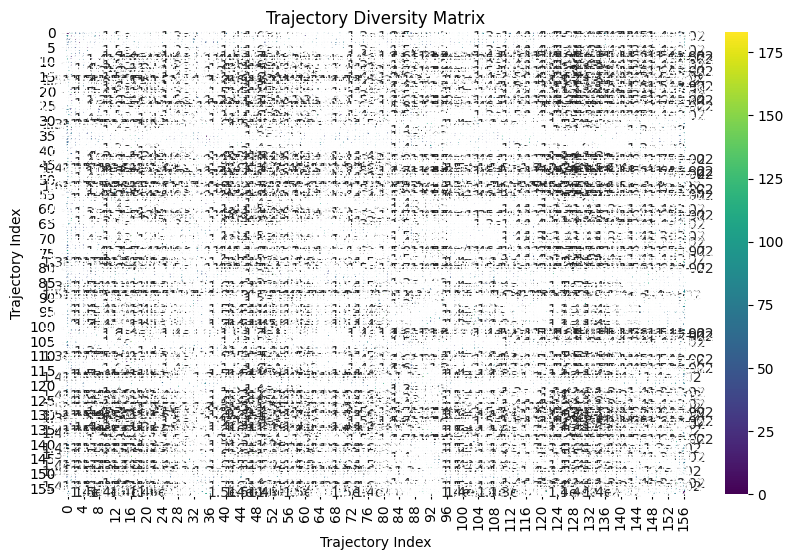

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(diversity_df, annot=True, cmap='viridis')

# Set the plot title and labels
plt.title('Trajectory Diversity Matrix')
plt.xlabel('Trajectory Index')
plt.ylabel('Trajectory Index')

# Display the plot
plt.show()


# Cluster Characterization: 
For each cluster in K-Means, calculate statistics for each feature (like the mean, median, and mode), and save the results. 

In [137]:
#Add an additional feature

In [138]:
from scipy import stats

# Create a DataFrame to store the statistics for each cluster
cluster_statistics = pd.DataFrame()

# Iterate through the unique cluster labels
for cluster in trajectory_df['Cluster'].unique():
    cluster_data = trajectory_df[trajectory_df['Cluster'] == cluster]
    
    # Calculate statistics for each feature
    statistics = {
        'Cluster': cluster,
        'Mean_Length': cluster_data['Length'].mean(),
        'Median_Length': cluster_data['Length'].median(),
        'Mode_Length': stats.mode(cluster_data['Length'])[0][0],
        'StdDev_Length': cluster_data['Length'].std(),
        'Min_Length': cluster_data['Length'].min(),
        'Max_Length': cluster_data['Length'].max(),
        'Mean_Time_Taken': cluster_data['Time Taken'].mean(),
        'Median_Time_Taken': cluster_data['Time Taken'].median(),
        'Mode_Time_Taken': stats.mode(cluster_data['Time Taken'])[0][0],
        'StdDev_Time_Taken': cluster_data['Time Taken'].std(),
        'Min_Time_Taken': cluster_data['Time Taken'].min(),
        'Max_Time_Taken': cluster_data['Time Taken'].max(),
        'Mode_Color_Preference': stats.mode(cluster_data['Color Preference'])[0][0]
        # For 'Path', you may want to define specific statistics or analyses
    }
    
    # Append the statistics for this cluster to the cluster_statistics DataFrame
    cluster_statistics = cluster_statistics.append(statistics, ignore_index=True)

# Set the Cluster column as the index
cluster_statistics.set_index('Cluster', inplace=True)

# Print the statistics for each cluster
print(cluster_statistics)

# Optionally, you can save the cluster_statistics DataFrame to a CSV file
cluster_statistics.to_csv('cluster_statistics.csv')


         Mean_Length  Median_Length  Mode_Length  StdDev_Length  Min_Length  \
Cluster                                                                       
3          22.560000           23.0           24       6.646302          11   
1           7.756757            7.0            5       4.405838           2   
0          38.693548           40.0           40       6.993179          23   
2          24.636364           25.0           34       7.725033           9   

         Max_Length  Mean_Time_Taken  Median_Time_Taken  Mode_Time_Taken  \
Cluster                                                                    
3                35         0.000222                0.0              0.0   
1                18         0.000333                0.0              0.0   
0                50         0.000575                0.0              0.0   
2                37         0.000213                0.0              0.0   

         StdDev_Time_Taken  Min_Time_Taken  Max_Time_Taken  \
Cluste

C:\Users\taodz\AppData\Local\Temp\ipykernel_7568\235545487.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  'Mode_Length': stats.mode(cluster_data['Length'])[0][0],
C:\Users\taodz\AppData\Local\Temp\ipykernel_7568\235545487.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid

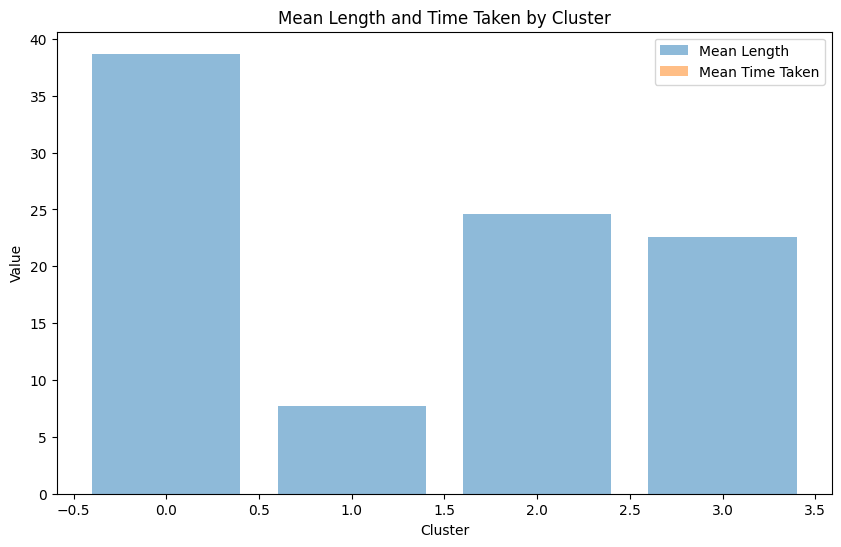

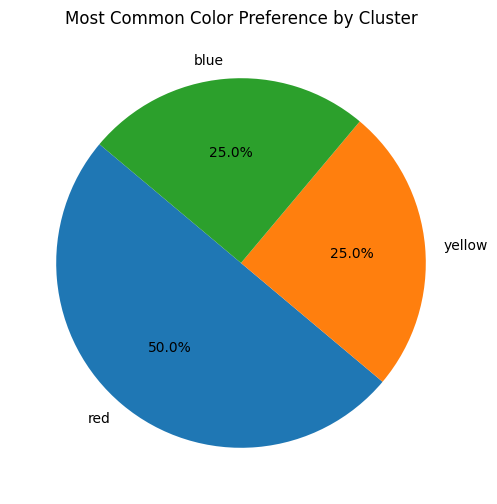

In [133]:
import matplotlib.pyplot as plt

# Bar Plot for Mean Length and Mean Time Taken
plt.figure(figsize=[10,6])
plt.bar(cluster_statistics.index, cluster_statistics['Mean_Length'], alpha=0.5, label='Mean Length')
plt.bar(cluster_statistics.index, cluster_statistics['Mean_Time_Taken'], alpha=0.5, label='Mean Time Taken')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.title('Mean Length and Time Taken by Cluster')
plt.legend()
plt.show()

# Pie Chart for Color Preferences
color_modes = cluster_statistics['Mode_Color_Preference'].value_counts()
plt.figure(figsize=[6,6])
plt.pie(color_modes, labels=color_modes.index, autopct='%1.1f%%', startangle=140)
plt.title('Most Common Color Preference by Cluster')
plt.show()


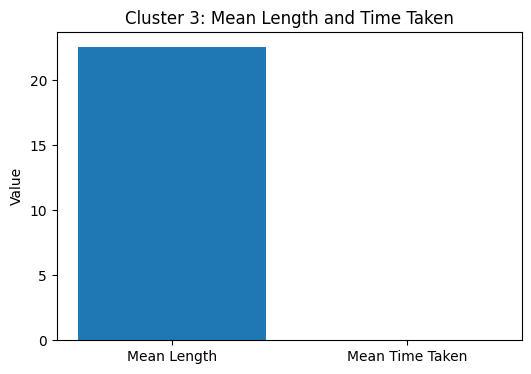

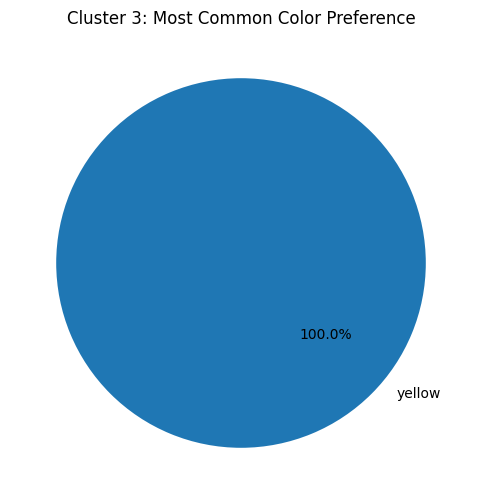

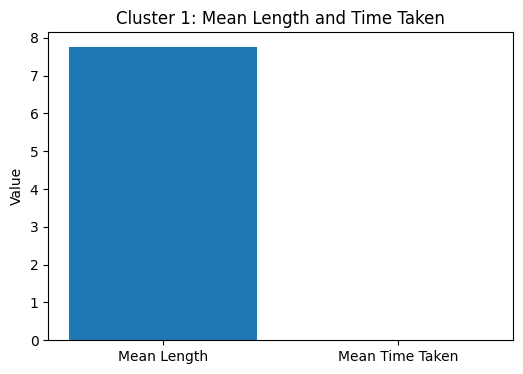

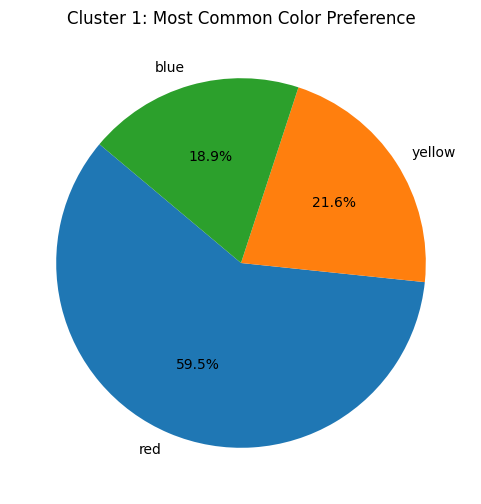

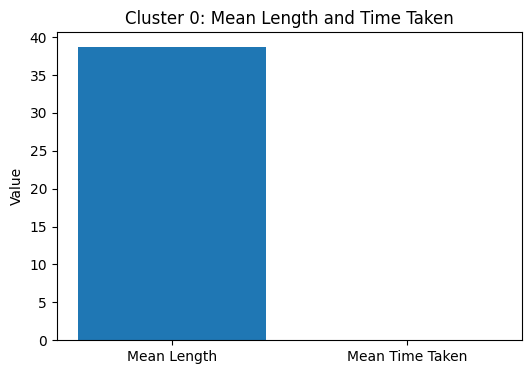

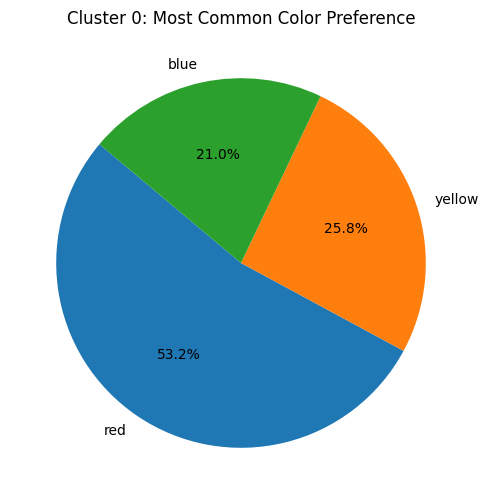

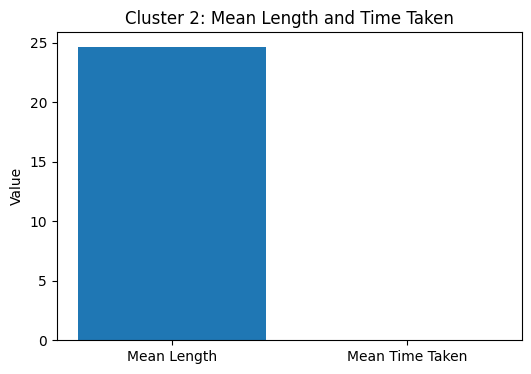

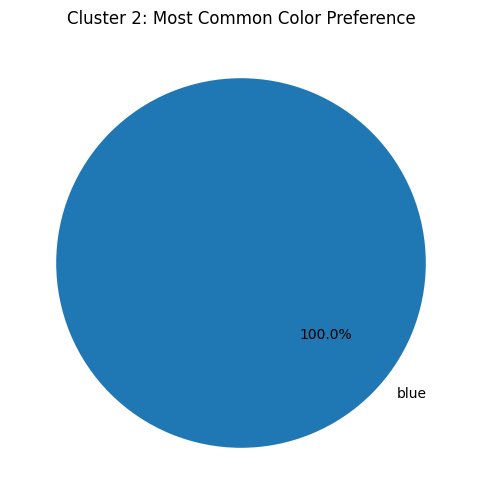

In [139]:
import matplotlib.pyplot as plt

# Iterate through each cluster and plot the graphs
for cluster in cluster_statistics.index:
    cluster_data = df[df['Cluster'] == cluster]
    
    # Bar Plot for Mean Length and Mean Time Taken for this cluster
    plt.figure(figsize=[6,4])
    plt.bar(['Mean Length', 'Mean Time Taken'], [cluster_statistics.loc[cluster, 'Mean_Length'], cluster_statistics.loc[cluster, 'Mean_Time_Taken']])
    plt.ylabel('Value')
    plt.title(f'Cluster {cluster}: Mean Length and Time Taken')
    plt.show()

    # Pie Chart for Color Preferences for this cluster
    color_modes = cluster_data['Color Preference'].value_counts()
    plt.figure(figsize=[6,6])
    plt.pie(color_modes, labels=color_modes.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Cluster {cluster}: Most Common Color Preference')
    plt.show()


In [141]:
trajectory_df.columns

Index(['Agent', 'Start Node', 'End Node', 'Color Preference', 'Path', 'Length',
       'Time Taken', 'Preferred_Color_Count', 'Distinct_Nodes_Visited',
       'Path_Complexity', 'Traversal_Success_Rate', 'Cluster'],
      dtype='object')

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Select features and target
total_nodes=num_nodes
# Speed
# trajectory_df['Speed'] = trajectory_df['Length'] / trajectory_df['Time Taken']

# Normalized Length (assuming you have a variable 'total_nodes' representing the total number of nodes)
trajectory_df['Normalized_Length'] = trajectory_df['Length'] / total_nodes

# Number of Unique Nodes Visited in Path
trajectory_df['Unique_Nodes'] = trajectory_df['Path'].apply(lambda x: len(set(x)))

# Frequency of Most Common Node in Path
trajectory_df['Most_Common_Node_Frequency'] = trajectory_df['Path'].apply(lambda x: max([x.count(node) for node in set(x)]))

# Now you can use these new features in your model training
X = trajectory_df[['Length', 'Time Taken', 'Normalized_Length', 'Unique_Nodes', 'Most_Common_Node_Frequency']]
y = trajectory_df['Cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)
model.fit(X_train, y_train)

# ************************************************************
# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and fit the Random Forest model
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# **************************************************************

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Optionally sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Save to CSV
feature_importance_df.to_csv('feature_importances.csv', index=False)

                      Feature  Importance
3                Unique_Nodes    0.417521
0                      Length    0.334548
1                  Time Taken    0.191287
4  Most_Common_Node_Frequency    0.056643
2           Normalized_Length    0.000000


In [111]:
# print(df.isnull().sum())  # Check for NaN values
# print(np.isinf(df).sum()) # Check for Inf values
# df.fillna(df.mean(), inplace=True)
# df.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace Inf with NaN
# df.fillna(df.mean(), inplace=True)  

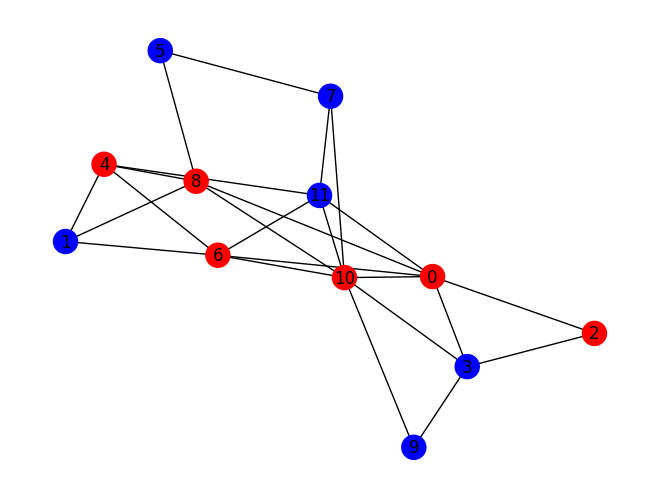

In [15]:
# we give a weight of 0.5 to nodes that have a preferred color available, a weight of 1.4 to nodes 
# that have an unpreferred color available, and a weight of 1 to nodes that have neither a preferred nor an unpreferred color available. 
# This should bias the agent towards nodes that have preferred colors, 
# while still allowing it to traverse the graph if no preferred colors are available.

class Agent:
    def __init__(self, color_preference):
        self.color_preference = color_preference
        self.current_node = None
        self.visited_nodes = set()

    def choose_next_node(self, G):
        # Get unvisited neighbors of current node
        neighbors = list(G.neighbors(self.current_node))
        unvisited_neighbors = [n for n in neighbors if n not in self.visited_nodes]

        # Choose next node with bias for preferred colors
        preferred_colors = G.nodes[self.current_node]['color']
        unpreferred_colors = list(set(self.color_preference) - set(preferred_colors))
        weights = []
        for n in unvisited_neighbors:
            node_colors = G.nodes[n]['color']
            if set(preferred_colors).intersection(node_colors):
                # If a preferred color is available, give it less weight
                weights.append(0.5)
            elif set(unpreferred_colors).intersection(node_colors):
                # If an unpreferred color is available, give it less weight
                weights.append(1.4)
            else:
                weights.append(1)
        if weights:
            total_weight = sum(weights)
            probabilities = [w / total_weight for w in weights]
            next_node = np.random.choice(unvisited_neighbors, p=probabilities)
        else:
            next_node = None

        # If all neighbors have been visited, return to previous node
#         if next_node is None:
#             next_node = self.current_node

        # Update visited nodes and current node
        self.visited_nodes.add(next_node)
        self.current_node = next_node

        return next_node

def create_agent(color_preference, start_node, end_node):
    return {
        'color_preference': set(color_preference),
        'current_node': start_node,
        'visited_nodes': {start_node},
        'end_node': end_node
    }

def find_shortest_path_with_preference(G, start_node, end_node, color_preference):
    path = []
    current_node = start_node
    visited_nodes = {start_node}
    while current_node != end_node:
        agent = create_agent(color_preference)
        agent.current_node = current_node
        next_node = agent.choose_next_node(G, visited_nodes)
        if not next_node:
            return None
        path.append((current_node, next_node))
        visited_nodes.add(next_node)
        current_node = next_node
        if current_node == end_node:
            path.append((current_node, None))
    return path


def traverse_graph_with_agents(G, agents):
    all_paths = []
    for agent in agents:
        agent['current_node'] = random.choice(list(G.nodes()))
        # set default color preference if none is specified for the agent
        if agent['color_preference'] is None:
            agent['color_preference'] = random.choice(list(G.nodes(data='color')))
        path = [agent['current_node']]
        visited_nodes = {agent['current_node']}
        while True:
            # get neighboring nodes and their colors
            neighbor_colors = {}
            for neighbor in G.neighbors(agent['current_node']):
                if neighbor not in visited_nodes:
                    color = G.nodes[neighbor]['color']
                    neighbor_colors[neighbor] = color
            # try to find a path to a node with preferred color
            if agent['color_preference'] in neighbor_colors.values():
                next_node = find_shortest_path_with_preference(G, agent['current_node'], agent['color_preference'], agent['visited_nodes'])
            # if no preferred color found, traverse to any unvisited neighbor
            else:
                unvisited_neighbors = [neighbor for neighbor in neighbor_colors.keys() if neighbor not in visited_nodes]
                if len(unvisited_neighbors) == 0:
                    break
                next_node = random.choice(unvisited_neighbors)
            visited_nodes.add(next_node)
            agent['current_node'] = next_node
            path.append(next_node)
            if next_node == agent['end_node']:
                break
        all_paths.append(path)
    return all_paths

colors = ['red', 'blue']
num_nodes = 12
edge_probability = 0.3
node_color_seed = 42  # Set a fixed seed for node colors for reproducibility
edge_seed = 123  # Set a fixed seed for edge probabilities for reproducibility
G = generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed)

# Draw graph
node_colors = [G.nodes[i]['color'] for i in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()


In [18]:
start_node = 9
end_node = 2

agents = [create_agent(['red'], start_node, end_node),
    create_agent(['blue'], start_node, end_node),
#     create_agent(['blue'], start_node, end_node),
#     create_agent(['yellow'], start_node, end_node),
#     create_agent(['red', 'green'], start_node, end_node),
#     create_agent(['red', 'blue'], start_node, end_node),
#     create_agent(['red', 'yellow'], start_node, end_node),
#     create_agent(['green', 'blue'], start_node, end_node),
#     create_agent(['green', 'yellow'], start_node, end_node),
#     create_agent(['blue', 'yellow'], start_node, end_node)
]

In [19]:
all_paths = traverse_graph_with_agents(G, agents)
for path in all_paths:
    print(path)    

[9, 10, 0, 2]
[1, 4, 6, 11, 10, 0, 8, 5, 7]


In [20]:
# Create a DataFrame from the all_paths list
# df = pd.DataFrame(all_paths, columns=["Agent{}".format(i+1) for i in range(len(agents)+1)])

# Print the DataFrame
# print(df)


In [21]:

"""
Makes the graph much sparser-done
try avoiding looping-Done
run more tests

Notes:
1. Make it print the start and end node
2. it shouldnt jump around notes but follow the edges 
3. Make it not look too much-debatable esp when we bias colors

Next Steps:
-lets generate a few traj or red and a few of blue, sense check them
-Cluster them 
-red and blue nodes
-20 trajectories that are red and 20 that are blue 
-a few traj of pref 1 and a few traj for pref 2
-then how do we extract the preference.
-Build up those kind of insights 
-have a small graph 
-look at node numbers, or node colors in the clusters of the agents 
-Are we gonna know only the nodes or what?
-think about, could something like Brandon`s algos be implemented?
-what makes sense? we need to make some design decisions
-
Branden
-consider conectivity, is it tuneable?
-how we identify which ones are red or which ones are blue-maybe clustering
Starting point 
-longest common subsequesnce/sequence type of approaches, levenshein distance functions
-then use standard clustering algorithms 
-Lev distanceenshtein\
-Levenshtein distance
-LCSS
-trajector similarity

To Do
generate a graph with 2 colors 
one randomize the noes 
he oother i add noise to the heuristic
record the number of times when the agent took the less preferred path
determine a diversity matrix, how the trajectories differ from each other
compare the diversity with a random baseline
calculate and do an average of the diversity 


Paper
Methodology 
Experiment 
Prof available Tues & thursday mornings

"""

'\nMakes the graph much sparser-done\ntry avoiding looping-Done\nrun more tests\n\nNotes:\n1. Make it print the start and end node\n2. it shouldnt jump around notes but follow the edges \n3. Make it not look too much-debatable esp when we bias colors\n\nNext Steps:\n-lets generate a few traj or red and a few of blue, sense check them\n-Cluster them \n-red and blue nodes\n-20 trajectories that are red and 20 that are blue \n-a few traj of pref 1 and a few traj for pref 2\n-then how do we extract the preference.\n-Build up those kind of insights \n-have a small graph \n-look at node numbers, or node colors in the clusters of the agents \n-Are we gonna know only the nodes or what?\n-think about, could something like Brandon`s algos be implemented?\n-what makes sense? we need to make some design decisions\n-\nBranden\n-consider conectivity, is it tuneable?\n-how we identify which ones are red or which ones are blue-maybe clustering\nStarting point \n-longest common subsequesnce/sequence ty

In [22]:
"""
Dataframe that includes the agent number, the path the agent took, 
and the percentage of nodes in the path that matched the agent's preferred color.

Notes: Pro Feedback
-bug of returning to the same node
-not terminating on the correct node
-maybe its looping
-sanity check it
-make it terminate at the last node
-FIX BUGS
1. Generate variation, if the pref was 0.6 or something, it should generate few variation of the same preference 
Then data creation is complete.
trace through the trajectories of similar agents with slight variations.
2. How do we identify preferences?
-Build an algorithm that extract preferences.

"""


import pandas as pd

# Create a list to store the output data
output_data = []

# Loop through all agents and their paths
for i, path in enumerate(all_paths):
    agent = agents[i]
    color_count = 0
    for node in path:
        node_color = G.nodes[node]['color']
        if node_color in agent['color_preference']:
            color_count += 1
    percentage = color_count / len(path) * 100
    output_data.append({'agent': i+1, 'path': path, 'color_percentage': percentage})

# Create a dataframe from the output data
df = pd.DataFrame(output_data)

# Print the dataframe
print(df.head(10))


   agent                           path  color_percentage
0      1                  [9, 10, 0, 2]         75.000000
1      2  [1, 4, 6, 11, 10, 0, 8, 5, 7]         44.444444


It seems like the termination condition for the agents' traversal is not checking whether the agent has reached the end node or not. The while True loop in traverse_graph_with_agents function is only breaking if there are no unvisited neighbors left.
Fix, add a check inside the loop to see if the agent has reached the end node or not. If the agent has reached the end node, we can break the loop and append the end node to its path.

******************************Try again **********************************

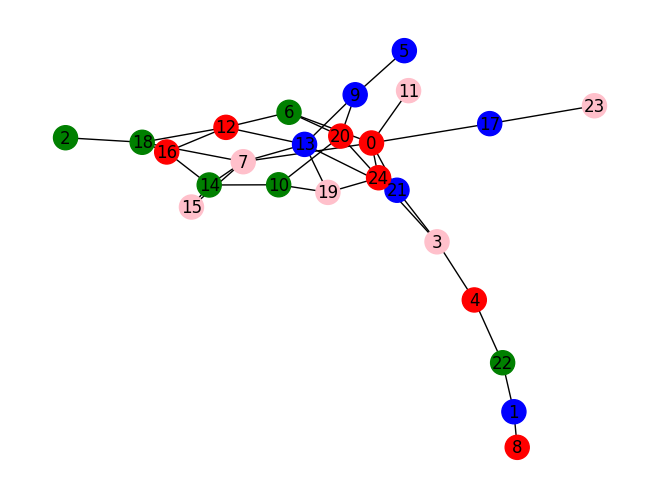

{'path': [24, 20, 9, 13, 12, 16, 18, 2], 'agent': {'color_preference': ['red'], 'start_node': 0, 'end_node': 29, 'current_node': 2, 'visited_nodes': {0, 2, 9, 12, 13, 16, 18, 20, 24}, 'path': []}}
{'path': [6, 12, 18, 2], 'agent': {'color_preference': ['green'], 'start_node': 0, 'end_node': 29, 'current_node': 2, 'visited_nodes': {0, 2, 6, 12, 18}, 'path': []}}
{'path': [17, 23], 'agent': {'color_preference': ['blue'], 'start_node': 0, 'end_node': 29, 'current_node': 23, 'visited_nodes': {0, 17, 23}, 'path': []}}


In [22]:

def create_agent(color_preference, start_node, end_node):
    agent = {
        'color_preference': color_preference,
        'start_node': start_node,
        'end_node': end_node,
        'current_node': None,
        'visited_nodes': set(),
        'path': []
    }
    return agent


def find_shortest_path_with_preference(G, start, end, color_preference, max_depth=float('inf')):
    queue = [(start, [])]
    visited = set()
    while queue:
        (node, path) = queue.pop(0)
        if node == end:
            return path + [node]
        if node in visited or len(path) >= max_depth:
            continue
        visited.add(node)
        neighbors = G[node]
        preferred_neighbors = [n for n in neighbors if G.nodes[n]['color'] in color_preference]
        non_preferred_neighbors = [n for n in neighbors if n not in preferred_neighbors]
        queue += [(n, path + [node]) for n in preferred_neighbors + non_preferred_neighbors]
    return None

def traverse_graph_with_agents(G, agents):
    all_paths = []
    for agent in agents:
        path = []
        agent['current_node'] = agent['start_node']
        agent['visited_nodes'] = set([agent['start_node']])
        while agent['current_node'] != agent['end_node']:
            current_color_preference = agent['color_preference']
            current_node = agent['current_node']
            neighbors = G[current_node]
            preferred_neighbors = [n for n in neighbors if G.nodes[n]['color'] in current_color_preference]
            if not preferred_neighbors:
                preferred_neighbors = list(neighbors)
            unvisited_neighbors = [n for n in preferred_neighbors if n not in agent['visited_nodes']]
            if not unvisited_neighbors:
                unvisited_neighbors = [n for n in neighbors if n not in agent['visited_nodes']]
            if not unvisited_neighbors:
                break
            next_node = random.choice(unvisited_neighbors)
            agent['visited_nodes'].add(next_node)
            agent['current_node'] = next_node
            path.append(next_node)
        all_paths.append({'path': path, 'agent': agent})
    return all_paths

colors = ['red', 'blue', 'green','pink']
G = generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed)

# Draw graph
node_colors = [G.nodes[i]['color'] for i in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()

start_node = 0
end_node = 29

agents = [create_agent(['red'], start_node, end_node),
    create_agent(['green'], start_node, end_node),
    create_agent(['blue'], start_node, end_node),
    # create_agent(['yellow'], start_node, end_node),
    # create_agent(['red', 'green'], start_node, end_node),
    # create_agent(['red', 'blue'], start_node, end_node),
    # create_agent(['red', 'yellow'], start_node, end_node),
    # create_agent(['green', 'blue'], start_node, end_node),
    # create_agent(['green', 'yellow'], start_node, end_node),
    # create_agent(['blue', 'yellow'], start_node, end_node)
]

all_paths = traverse_graph_with_agents(G, agents)
for path in all_paths:
    print(path)
